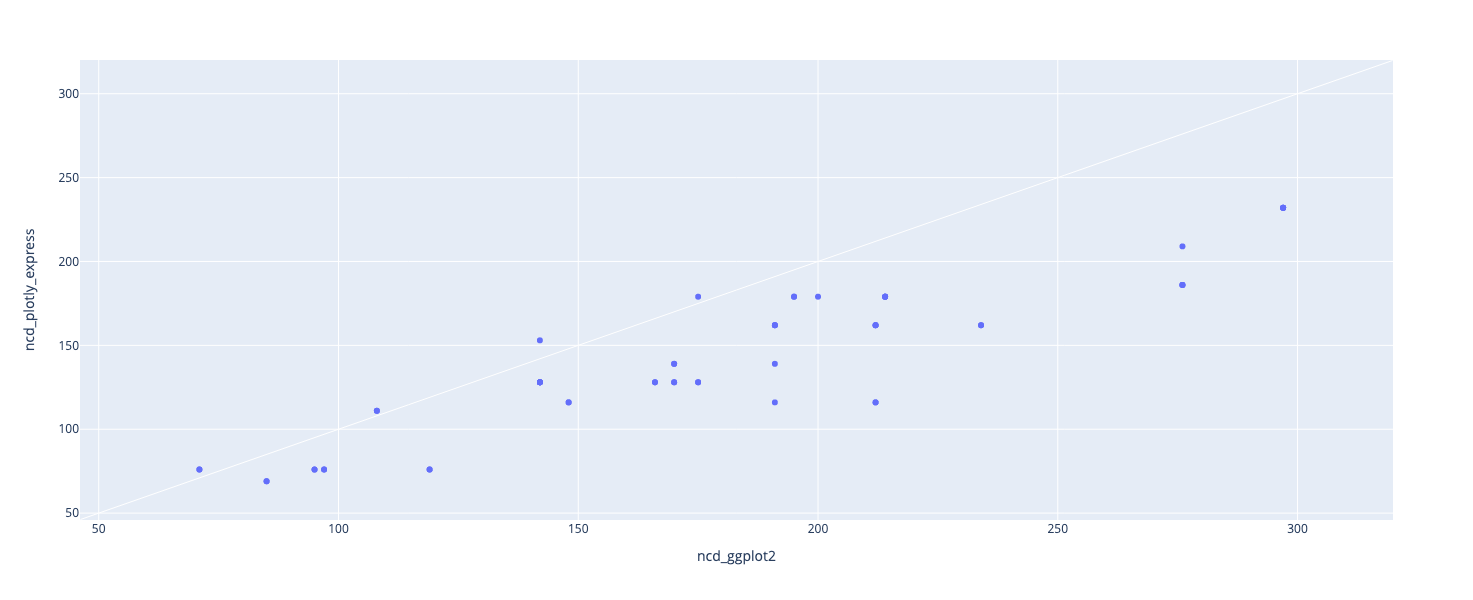

In [74]:
from src.distances import load_distances
import plotly.express as px


df = load_distances()

notation1 = "ggplot2"
notation2 = "plotly_express"
distance1 = "ncd"
distance2 = "ncd"

merged = pd.merge(df.query(f"study=='basic' and notation=='{notation1}'")[["from_slug", "to_slug", distance1]], 
                  df.query(f"study=='basic' and notation=='{notation2}'")[["from_slug", "to_slug", distance2]], 
                  on=["from_slug", "to_slug"], suffixes=["_" + notation1, "_"+ notation2])

x= distance1+"_"+notation1
y= distance2+"_"+notation2
fig = px.scatter(merged, x=x, y=y,
                 hover_data=merged.columns, width=600, height=600)

if distance1 == distance2:
    the_min = min(merged[x].min(), merged[y].min())
    the_max = max(merged[x].max(), merged[y].max())
    stretch = 0.1*(the_max-the_min)
    fig.add_shape(type="line", line=dict(color="white", width=1),
                  x0=the_min-stretch, y0=the_min-stretch,
                  x1=the_max+stretch, y1=the_max+stretch)


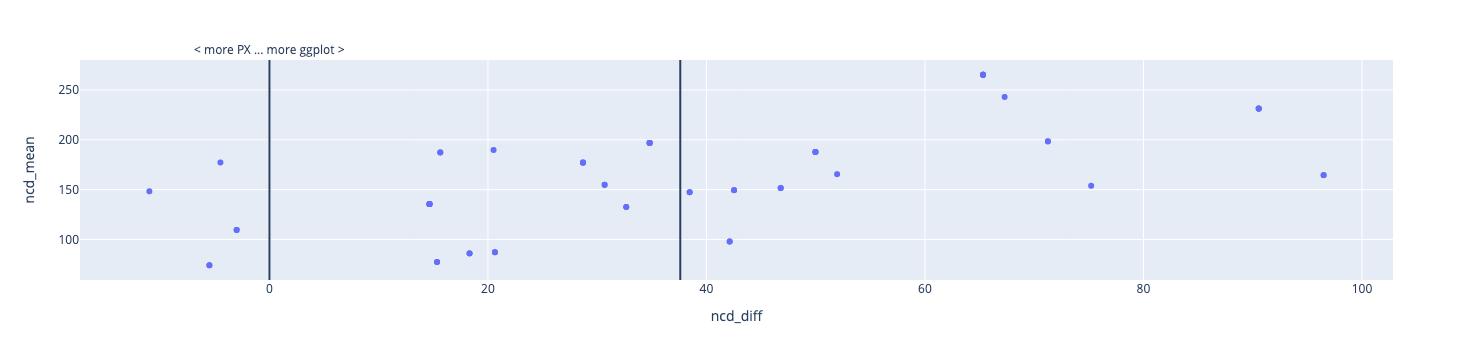

In [21]:
px.scatter(merged, y="ncd_mean", x="ncd_diff",
           hover_data=merged.columns
          ).add_vline(x=0, annotation_text="< more PX ... more ggplot >", annotation_position="top").add_vline(
    x=merged.ncd_diff.mean())